# **Welcome! In this notebook, we'll solve Homework 5.14 and 5.15 together in Python.**

For this problem, we only need numpy.

In [1]:
#Just numpy
import numpy as np

We need to calculate many things about graphs.

Having to enter graphs into programs manually in anything but the most convenient way can quickly become a hassle. In this problem, we are able to assume we're given the adjacency matrix and the degree matrix - but as we're likely intending to run this program on a few different graphs, it will quickly pay off to make a method for the program to generate those matrices for us after we enter the bare minimum of data manually!

Let's decide on a very simple way to describe a graph - a list, where each index is a node and contains a list with the identifiers of all nodes that it is connected to.

So to use our example from Quiz 5:

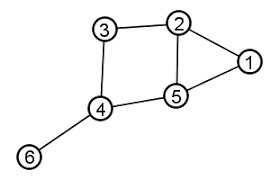

We would enter this as $[[2,5],[1,3,5],[2,4],[3,5,6],[1,2,4],[4]]$.

In [2]:
rawGraphData = [[2,5],[1,3,5],[2,4],[3,5,6],[1,2,4],[4]]

Now, let's write a method to generate the adjacency matrix.

In [3]:
def makeAdjMatrix(rawData):
    
    adj = []
    
    #Generate the adjacency matrix row by row.
    #For each vertex:
    for i in range(1,len(rawData)+1):
        
        #Build each row in parts.
        row = []
        
        #For each vertex:
        for j in range(1,len(rawData)+1):
            
            #Check if our i vertex has an edge to our j matrix.
            #We subtract 1 as our vertices aren't zero-indexed.
            if j in rawData[i-1]:
                
                #They have an edge!
                row.append(1)
                
            else:
                
                #They don't have an edge.
                row.append(0)
                
        adj.append(row)
        
    return np.matrix(adj)       

Let's test this method on our Quiz 5 graph!

In [4]:
adjMatrix = makeAdjMatrix(rawGraphData)

print(adjMatrix)

[[0 1 0 0 1 0]
 [1 0 1 0 1 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 1]
 [1 1 0 1 0 0]
 [0 0 0 1 0 0]]


This looks good! Time to focus on making a degree matrix. We'll write and test this similarly.

In [5]:
def makeDegMatrix(adj):
    
    #We want to sum the entries in each column to find the degree,
    #and then write the sum on the diagonal to make a degree matrix.
    
    #Keep track of each sum.    
    totals = []
    
    #For each column of the adjacency matrix:
    for i in range(len(adj)):
        
        total = 0
        
        #For each column entry:
        for j in range(len(adj)):
            
            #Add the entry to the sum.
            total += adj[i,j]
            
        totals.append(total)
    
    #Now that we have the degrees, turn it into a diagonal matrix.
    deg = np.diag(totals)
    
    return deg

Time to test our code!

In [6]:
degMatrix = makeDegMatrix(adjMatrix)

degMatrix

array([[2, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 1]])

Looks good once again! Now let's tie this together into our main method, which will take our raw data and compute the clustering we desire.

In [7]:
def cluster(rawData):
    
    #Make adjacency and degree matrices.
    adj = makeAdjMatrix(rawData)    
    deg = makeDegMatrix(adj)
    
    #Compute the laplacian.
    laplacian = deg - adj

    #Compute the eigenvalues and corresponding eigenvectors.
    eigvals, eigvects = np.linalg.eig(laplacian)

    #Sort and then take the second smallest computed eigenvalue.
    secondEig = np.sort(eigvals.copy())[1]

    #Find the pre-sorted index of the second smallest eigenvalue.
    index = np.where(eigvals == secondEig)

    #Take the corresponding eigenvector.
    column = eigvects[:,index[0]]

    #Positive and negative values will be separated.
    pos = []
    neg = []

    for i in range(len(rawData)):
        
        #Test if negative and sort correspondingly.
        if column[i] < 0:
            neg.append(i + 1)
        else:
            pos.append(i + 1)
    
    return (pos,neg)

Now we put our method to work to calculate our Quiz 5 problem!

In [8]:
print(cluster(rawGraphData))

([4, 6], [1, 2, 3, 5])


Now let's apply this to the graph we're given in the homework, shown below!

All we have to do is manually write out our raw data as a list, and then plug this into our method.

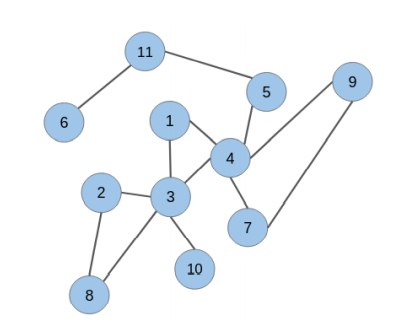

In [9]:
rawGraphData = [[3,4],[3,8],[1,2,4,8,10],[1,3,5,7,9],[4,11],[11],[4,9],[2,3],[4,7],[3],[5,6]]

print(cluster(rawGraphData))

([1, 2, 3, 4, 7, 8, 9, 10], [5, 6, 11])


So we conclude that $[5,6,11]$ is one cluster, and the remaining vertices are the second cluster!

***

Thanks for reading this week's problem, and as always, feel free to email me with any questions!

-Charles